# Homework 6: Numpy in Python 

## Exercise 1 (20 points)
1. Create a 1 x 5 ndarray with elements with random values
2. Use the “for” loop to find the greatest element of the matrix
3. Use the “while” loop to find the smallest element of the matrix
4. Use numpy methods to find the greatest and smallest element of the matrix.

In [13]:
# part 1
import numpy as np
a = np.random.random((1,5))
print(a)

[[0.13264679 0.72798721 0.88442776 0.96927829 0.6721234 ]]


In [36]:
# part 2
import numpy as np
a = np.random.random((1,5))        
print("Random array: ",a)

greatest = a[0,0]
for i in a:
    for m in i:
        if m > greatest:
            greatest = m

print("Greatest element is: ", greatest)




Random array:  [[0.31116366 0.11903183 0.20657691 0.05098468 0.30117277]]
Greatest:  0.3111636599540265


In [6]:
# part 3
import numpy as np
a = np.random.random((1,5))        

small = a[0,0]
row, col = a.shape

x, y = 0, 0
while x < row:
    while y < col:
        if a[x, y] < small:
            small = a[x, y]
        y += 1
    y = 0
    x += 1
    
print ("smallest element is : ", small)
# print ("smallest element is:", a.min()) 


smallest element is :  0.33175327482764627


In [36]:
# part 4
import numpy as np
a = np.random.random((1,5)) 
print("the array: ", a)
print("greatest element is: ", a.max())
print ("smallest element is:", a.min()) 

the array:  [[0.39668022 0.33346332 0.20806118 0.03896891 0.30676778]]
greatest element is:  0.39668022361486766
smallest element is: 0.03896891410316716


## Exercise 2 (30 points)
### part 1: 
Find a short Python expression to build the matrix
B =
$$\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 \\
9 & 7 & 5 & 3 & 1 & −1 & −3 \\
4 & 8 & 16 &32 &64 & 128 &256 \\
\end{pmatrix}$$

In [44]:
## code here
import numpy as np
a = np.arange(1,8)
b = np.arange(9, -4, -2)
c = 2** np.arange(2, 9)
B = np.array([a,b,c])
print(B)

[[  1   2   3   4   5   6   7]
 [  9   7   5   3   1  -1  -3]
 [  4   8  16  32  64 128 256]]


### Part 2: 
Using numpy module, give a Python expression that multiplies two vectors to obtain:
a) the matrix
$$\begin{pmatrix}
1 & 2 & 3 & 4 & 5\\
1 & 2 & 3 & 4 & 5\\
1 & 2 & 3 & 4 & 5\\
\end{pmatrix}$$

In [43]:
## code here
import numpy as np
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 1])

matrix = (a * b[:, None])

print(matrix)


[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]


### Part 3: 
Using numpy module, give a Python expression that multiplies two vectors to obtain:
a) the matrix
$$\begin{pmatrix}
0 & 0 & 0\\
1 & 1 & 1\\
2 & 2 & 2\\
3 & 3 & 3\\
4 & 4 & 4\\
\end{pmatrix}$$

In [42]:
## code here
import numpy as np
a = np.array([0, 1, 2, 3, 4])
b = np.array([1, 1, 1])

matrix = (a[:,None] * b)

print(matrix)

[[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]


## Exercise 3: Three-dimensional Shepp-Logan phantom (25 points):
Shepp-Logan head phantom is the classical model of simulation computing in Computerized Tomography. The following is a function created to generate 3D array that is a 3D representation of head and each element in this 3D array is refered by voxel (like pixel in 2D array). The voxel's value is proportional to the density in that location. 


In [37]:
from __future__ import division
import numpy as np


def phantom3d(phantom='modified-shepp-logan', n=64):
    """Three-dimensional Shepp-Logan phantom
    Can be used to test 3-D reconstruction algorithms.
    Parameters
    ==========
    phantom: str
        One of {'modified-shepp-logan', 'shepp_logan', 'yu_ye_wang'},
        The type of phantom to draw.
    n : int, optional
        The grid size of the phantom
    Notes
    =====
    For any given voxel in the output image, the voxel's value is equal to the
    sum of the additive intensity values of all ellipsoids that the voxel is a
    part of.  If a voxel is not part of any ellipsoid, its value is 0.
    The additive intensity value A for an ellipsoid can be positive or
    negative;  if it is negative, the ellipsoid will be darker than the
    surrounding pixels.
    Note that, depending on the values of A, some voxels may have values
    outside the range [0,1].
    Copyright
    =========
    BSD License
    Copyright 2006 Matthias Christian Schabel (matthias @ stanfordalumni . org)
    University of Utah Department of Radiology
    Utah Center for Advanced Imaging Research
    729 Arapeen Drive
    """
    if phantom == 'modified-shepp-logan':
        ellipse = modified_shepp_logan()
    elif phantom == 'shepp_logan':
        ellipse = shepp_logan()
    elif phantom == 'yu_ye_wang':
        ellipse = yu_ye_wang()
    else:
        raise TypeError('phantom type "%s" not recognized' % phantom)

    p = np.zeros(n ** 3)
    rng = ((np.arange(0, n - 1)) - (n - 1) / 2) / ((n - 1) / 2)
    x, y, z = np.meshgrid(rng, rng, rng)
    coord = np.vstack((x.flatten(), y.flatten(), z.flatten()))
    pi = np.pi

    for k in np.arange(ellipse.shape[0]):
        A = ellipse[k, 0]                 # Amplitude change for this ellipsoid
        asq = ellipse[k, 1] ** 2          # a^2
        bsq = ellipse[k, 2] ** 2          # b^2
        csq = ellipse[k, 3] ** 2          # c^2
        x0 = ellipse[k, 4]                # x offset
        y0 = ellipse[k, 5]                # y offset
        z0 = ellipse[k, 6]                # z offset
        phi = ellipse[k, 7] * pi / 180    # first Euler angle in radians
        theta = ellipse[k, 8] * pi / 180  # second Euler angle in radians
        psi = ellipse[k, 9] * pi / 180   # third Euler angle in radians

        cphi = np.cos(phi)
        sphi = np.sin(phi)
        ctheta = np.cos(theta)
        stheta = np.sin(theta)
        cpsi = np.cos(psi)
        spsi = np.sin(psi)

        # Euler rotation matrix
        alpha = np.array([[cpsi * cphi - ctheta * sphi * spsi,
                           cpsi * sphi + ctheta * cphi * spsi,
                           spsi * stheta],
                          [-spsi * cphi - ctheta * sphi * cpsi,
                           -spsi * sphi + ctheta * cphi * cpsi,
                           cpsi * stheta],
                          [stheta * sphi, -stheta * cphi, ctheta]])

        # rotated ellipsoid coordinates
        coordp = np.dot(alpha, coord)
        idx = np.nonzero((coordp[0, :] - x0) ** 2.0 / asq +
                         (coordp[1, :] - y0) ** 2.0 / bsq +
                         (coordp[2, :] - z0) ** 2.0 / csq <= 1)[0]
        p[idx] = p[idx] + A

    return p.reshape((n, n, n))


def shepp_logan():
    arr = modified_shepp_logan()
    arr[:, 0] = np.array([1, -0.98, -0.02, -0.02, 0.01, 0.01, 0.01,
                          0.01, 0.01, 0.01])

    return arr


def modified_shepp_logan():
    """
    This head phantom is the same as the Shepp-Logan except
    the intensities are changed to yield higher contrast in
    the image.  Taken from Toft, 199-200.
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .810      0       0       0      0      0      0
        -.8  .6624  .874  .780      0  -.0184       0      0      0      0
        -.2  .1100  .310  .220    .22       0       0    -18      0     10
        -.2  .1600  .410  .280   -.22       0       0     18      0     10
         .1  .2100  .250  .410      0     .35    -.15      0      0      0
         .1  .0460  .046  .050      0      .1     .25      0      0      0
         .1  .0460  .046  .050      0     -.1     .25      0      0      0
         .1  .0460  .023  .050   -.08   -.605       0      0      0      0
         .1  .0230  .023  .020      0   -.606       0      0      0      0
         .1  .0230  .046  .020    .06   -.605       0      0      0      0'''
    return np.asarray(np.matrix(mat))


def yu_ye_wang():
    """
    Yu H, Ye Y, Wang G, Katsevich-Type Algorithms for
    Variable Radius Spiral Cone-Beam CT
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .900      0       0       0      0      0      0
        -.8  .6624  .874  .880      0       0       0      0      0      0
        -.2  .4100  .160  .210   -.22       0    -.25    108      0      0
        -.2  .3100  .110  .220    .22       0    -.25     72      0      0
         .2  .2100  .250  .500      0     .35    -.25      0      0      0
         .2  .0460  .046  .046      0      .1    -.25      0      0      0
         .1  .0460  .023  .020   -.08    -.65    -.25      0      0      0
         .1  .0460  .023  .020    .06    -.65    -.25     90      0      0
         .2  .0560  .040  .100    .06   -.105    .625     90      0      0
        -.2  .0560  .056  .100      0    .100    .625      0      0      0'''
    return np.asarray(np.matrix(mat))


if __name__ == '__main__':
    from matplotlib import pyplot as plt


Please run the above code before you proceed.

In the following code lines, we are using the function created above to generate a digital head phantom:

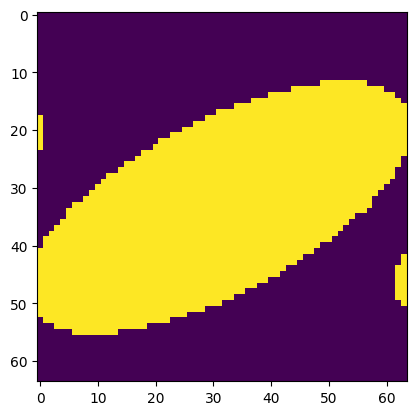

In [38]:
p = phantom3d()

## to plot slice number 30 along transverse axis (horizantaly):
plt.imshow(p[30, :, :])
plt.show()

### q1. What is the size of this phantom?

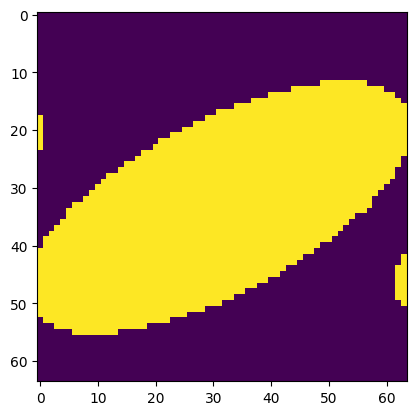

262144
(64, 64, 64)


In [48]:
# code here:
from __future__ import division
import numpy as np


def phantom3d(phantom='modified-shepp-logan', n=64):
    """Three-dimensional Shepp-Logan phantom
    Can be used to test 3-D reconstruction algorithms.
    Parameters
    ==========
    phantom: str
        One of {'modified-shepp-logan', 'shepp_logan', 'yu_ye_wang'},
        The type of phantom to draw.
    n : int, optional
        The grid size of the phantom
    Notes
    =====
    For any given voxel in the output image, the voxel's value is equal to the
    sum of the additive intensity values of all ellipsoids that the voxel is a
    part of.  If a voxel is not part of any ellipsoid, its value is 0.
    The additive intensity value A for an ellipsoid can be positive or
    negative;  if it is negative, the ellipsoid will be darker than the
    surrounding pixels.
    Note that, depending on the values of A, some voxels may have values
    outside the range [0,1].
    Copyright
    =========
    BSD License
    Copyright 2006 Matthias Christian Schabel (matthias @ stanfordalumni . org)
    University of Utah Department of Radiology
    Utah Center for Advanced Imaging Research
    729 Arapeen Drive
    """
    if phantom == 'modified-shepp-logan':
        ellipse = modified_shepp_logan()
    elif phantom == 'shepp_logan':
        ellipse = shepp_logan()
    elif phantom == 'yu_ye_wang':
        ellipse = yu_ye_wang()
    else:
        raise TypeError('phantom type "%s" not recognized' % phantom)

    p = np.zeros(n ** 3)
    rng = ((np.arange(0, n - 1)) - (n - 1) / 2) / ((n - 1) / 2)
    x, y, z = np.meshgrid(rng, rng, rng)
    coord = np.vstack((x.flatten(), y.flatten(), z.flatten()))
    pi = np.pi

    for k in np.arange(ellipse.shape[0]):
        A = ellipse[k, 0]                 # Amplitude change for this ellipsoid
        asq = ellipse[k, 1] ** 2          # a^2
        bsq = ellipse[k, 2] ** 2          # b^2
        csq = ellipse[k, 3] ** 2          # c^2
        x0 = ellipse[k, 4]                # x offset
        y0 = ellipse[k, 5]                # y offset
        z0 = ellipse[k, 6]                # z offset
        phi = ellipse[k, 7] * pi / 180    # first Euler angle in radians
        theta = ellipse[k, 8] * pi / 180  # second Euler angle in radians
        psi = ellipse[k, 9] * pi / 180   # third Euler angle in radians

        cphi = np.cos(phi)
        sphi = np.sin(phi)
        ctheta = np.cos(theta)
        stheta = np.sin(theta)
        cpsi = np.cos(psi)
        spsi = np.sin(psi)

        # Euler rotation matrix
        alpha = np.array([[cpsi * cphi - ctheta * sphi * spsi,
                           cpsi * sphi + ctheta * cphi * spsi,
                           spsi * stheta],
                          [-spsi * cphi - ctheta * sphi * cpsi,
                           -spsi * sphi + ctheta * cphi * cpsi,
                           cpsi * stheta],
                          [stheta * sphi, -stheta * cphi, ctheta]])

        # rotated ellipsoid coordinates
        coordp = np.dot(alpha, coord)
        idx = np.nonzero((coordp[0, :] - x0) ** 2.0 / asq +
                         (coordp[1, :] - y0) ** 2.0 / bsq +
                         (coordp[2, :] - z0) ** 2.0 / csq <= 1)[0]
        p[idx] = p[idx] + A

    return p.reshape((n, n, n))


def shepp_logan():
    arr = modified_shepp_logan()
    arr[:, 0] = np.array([1, -0.98, -0.02, -0.02, 0.01, 0.01, 0.01,
                          0.01, 0.01, 0.01])

    return arr


def modified_shepp_logan():
    """
    This head phantom is the same as the Shepp-Logan except
    the intensities are changed to yield higher contrast in
    the image.  Taken from Toft, 199-200.
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .810      0       0       0      0      0      0
        -.8  .6624  .874  .780      0  -.0184       0      0      0      0
        -.2  .1100  .310  .220    .22       0       0    -18      0     10
        -.2  .1600  .410  .280   -.22       0       0     18      0     10
         .1  .2100  .250  .410      0     .35    -.15      0      0      0
         .1  .0460  .046  .050      0      .1     .25      0      0      0
         .1  .0460  .046  .050      0     -.1     .25      0      0      0
         .1  .0460  .023  .050   -.08   -.605       0      0      0      0
         .1  .0230  .023  .020      0   -.606       0      0      0      0
         .1  .0230  .046  .020    .06   -.605       0      0      0      0'''
    return np.asarray(np.matrix(mat))


def yu_ye_wang():
    """
    Yu H, Ye Y, Wang G, Katsevich-Type Algorithms for
    Variable Radius Spiral Cone-Beam CT
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .900      0       0       0      0      0      0
        -.8  .6624  .874  .880      0       0       0      0      0      0
        -.2  .4100  .160  .210   -.22       0    -.25    108      0      0
        -.2  .3100  .110  .220    .22       0    -.25     72      0      0
         .2  .2100  .250  .500      0     .35    -.25      0      0      0
         .2  .0460  .046  .046      0      .1    -.25      0      0      0
         .1  .0460  .023  .020   -.08    -.65    -.25      0      0      0
         .1  .0460  .023  .020    .06    -.65    -.25     90      0      0
         .2  .0560  .040  .100    .06   -.105    .625     90      0      0
        -.2  .0560  .056  .100      0    .100    .625      0      0      0'''
    return np.asarray(np.matrix(mat))


if __name__ == '__main__':
    from matplotlib import pyplot as plt

p = phantom3d()

## to plot slice number 30 along transverse axis (horizantaly):
plt.imshow(p[30, :, :])
plt.show()

phantom_size = p.size
phantom_shape = p.shape
print(phantom_size)
print(phantom_shape)


### q2. Please plot the slice number 30 along the sagittal plane
![alt text here](image1.png)

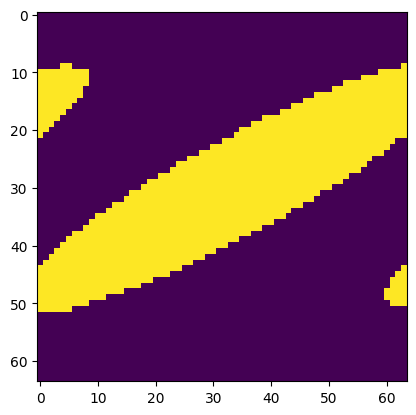

In [53]:
## code here
from __future__ import division
import numpy as np


def phantom3d(phantom='modified-shepp-logan', n=64):
    """Three-dimensional Shepp-Logan phantom
    Can be used to test 3-D reconstruction algorithms.
    Parameters
    ==========
    phantom: str
        One of {'modified-shepp-logan', 'shepp_logan', 'yu_ye_wang'},
        The type of phantom to draw.
    n : int, optional
        The grid size of the phantom
    Notes
    =====
    For any given voxel in the output image, the voxel's value is equal to the
    sum of the additive intensity values of all ellipsoids that the voxel is a
    part of.  If a voxel is not part of any ellipsoid, its value is 0.
    The additive intensity value A for an ellipsoid can be positive or
    negative;  if it is negative, the ellipsoid will be darker than the
    surrounding pixels.
    Note that, depending on the values of A, some voxels may have values
    outside the range [0,1].
    Copyright
    =========
    BSD License
    Copyright 2006 Matthias Christian Schabel (matthias @ stanfordalumni . org)
    University of Utah Department of Radiology
    Utah Center for Advanced Imaging Research
    729 Arapeen Drive
    """
    if phantom == 'modified-shepp-logan':
        ellipse = modified_shepp_logan()
    elif phantom == 'shepp_logan':
        ellipse = shepp_logan()
    elif phantom == 'yu_ye_wang':
        ellipse = yu_ye_wang()
    else:
        raise TypeError('phantom type "%s" not recognized' % phantom)

    p = np.zeros(n ** 3)
    rng = ((np.arange(0, n - 1)) - (n - 1) / 2) / ((n - 1) / 2)
    x, y, z = np.meshgrid(rng, rng, rng)
    coord = np.vstack((x.flatten(), y.flatten(), z.flatten()))
    pi = np.pi

    for k in np.arange(ellipse.shape[0]):
        A = ellipse[k, 0]                 # Amplitude change for this ellipsoid
        asq = ellipse[k, 1] ** 2          # a^2
        bsq = ellipse[k, 2] ** 2          # b^2
        csq = ellipse[k, 3] ** 2          # c^2
        x0 = ellipse[k, 4]                # x offset
        y0 = ellipse[k, 5]                # y offset
        z0 = ellipse[k, 6]                # z offset
        phi = ellipse[k, 7] * pi / 180    # first Euler angle in radians
        theta = ellipse[k, 8] * pi / 180  # second Euler angle in radians
        psi = ellipse[k, 9] * pi / 180   # third Euler angle in radians

        cphi = np.cos(phi)
        sphi = np.sin(phi)
        ctheta = np.cos(theta)
        stheta = np.sin(theta)
        cpsi = np.cos(psi)
        spsi = np.sin(psi)

        # Euler rotation matrix
        alpha = np.array([[cpsi * cphi - ctheta * sphi * spsi,
                           cpsi * sphi + ctheta * cphi * spsi,
                           spsi * stheta],
                          [-spsi * cphi - ctheta * sphi * cpsi,
                           -spsi * sphi + ctheta * cphi * cpsi,
                           cpsi * stheta],
                          [stheta * sphi, -stheta * cphi, ctheta]])

        # rotated ellipsoid coordinates
        coordp = np.dot(alpha, coord)
        idx = np.nonzero((coordp[0, :] - x0) ** 2.0 / asq +
                         (coordp[1, :] - y0) ** 2.0 / bsq +
                         (coordp[2, :] - z0) ** 2.0 / csq <= 1)[0]
        p[idx] = p[idx] + A

    return p.reshape((n, n, n))


def shepp_logan():
    arr = modified_shepp_logan()
    arr[:, 0] = np.array([1, -0.98, -0.02, -0.02, 0.01, 0.01, 0.01,
                          0.01, 0.01, 0.01])

    return arr


def modified_shepp_logan():
    """
    This head phantom is the same as the Shepp-Logan except
    the intensities are changed to yield higher contrast in
    the image.  Taken from Toft, 199-200.
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .810      0       0       0      0      0      0
        -.8  .6624  .874  .780      0  -.0184       0      0      0      0
        -.2  .1100  .310  .220    .22       0       0    -18      0     10
        -.2  .1600  .410  .280   -.22       0       0     18      0     10
         .1  .2100  .250  .410      0     .35    -.15      0      0      0
         .1  .0460  .046  .050      0      .1     .25      0      0      0
         .1  .0460  .046  .050      0     -.1     .25      0      0      0
         .1  .0460  .023  .050   -.08   -.605       0      0      0      0
         .1  .0230  .023  .020      0   -.606       0      0      0      0
         .1  .0230  .046  .020    .06   -.605       0      0      0      0'''
    return np.asarray(np.matrix(mat))


def yu_ye_wang():
    """
    Yu H, Ye Y, Wang G, Katsevich-Type Algorithms for
    Variable Radius Spiral Cone-Beam CT
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .900      0       0       0      0      0      0
        -.8  .6624  .874  .880      0       0       0      0      0      0
        -.2  .4100  .160  .210   -.22       0    -.25    108      0      0
        -.2  .3100  .110  .220    .22       0    -.25     72      0      0
         .2  .2100  .250  .500      0     .35    -.25      0      0      0
         .2  .0460  .046  .046      0      .1    -.25      0      0      0
         .1  .0460  .023  .020   -.08    -.65    -.25      0      0      0
         .1  .0460  .023  .020    .06    -.65    -.25     90      0      0
         .2  .0560  .040  .100    .06   -.105    .625     90      0      0
        -.2  .0560  .056  .100      0    .100    .625      0      0      0'''
    return np.asarray(np.matrix(mat))


if __name__ == '__main__':
    from matplotlib import pyplot as plt

p = phantom3d()

## to plot slice number 30 along saggital axis (horizantaly):
plt.imshow(p[:, :, 30])
plt.show()



### q3: So far, density of air (blue) is 0.0. Can you find the number of air voxels?
hints: https://thispointer.com/python-numpy-select-elements-or-indices-by-conditions-from-numpy-array/

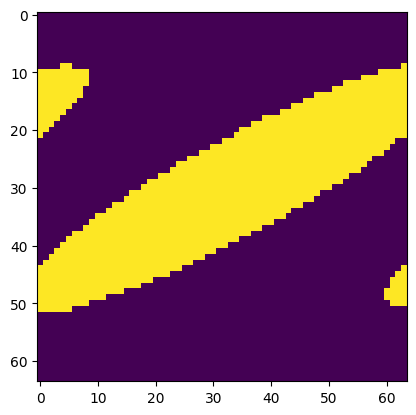

Number of air voxels: 194824


In [3]:
# code here:
## code here
from __future__ import division
import numpy as np


def phantom3d(phantom='modified-shepp-logan', n=64):
    """Three-dimensional Shepp-Logan phantom
    Can be used to test 3-D reconstruction algorithms.
    Parameters
    ==========
    phantom: str
        One of {'modified-shepp-logan', 'shepp_logan', 'yu_ye_wang'},
        The type of phantom to draw.
    n : int, optional
        The grid size of the phantom
    Notes
    =====
    For any given voxel in the output image, the voxel's value is equal to the
    sum of the additive intensity values of all ellipsoids that the voxel is a
    part of.  If a voxel is not part of any ellipsoid, its value is 0.
    The additive intensity value A for an ellipsoid can be positive or
    negative;  if it is negative, the ellipsoid will be darker than the
    surrounding pixels.
    Note that, depending on the values of A, some voxels may have values
    outside the range [0,1].
    Copyright
    =========
    BSD License
    Copyright 2006 Matthias Christian Schabel (matthias @ stanfordalumni . org)
    University of Utah Department of Radiology
    Utah Center for Advanced Imaging Research
    729 Arapeen Drive
    """
    if phantom == 'modified-shepp-logan':
        ellipse = modified_shepp_logan()
    elif phantom == 'shepp_logan':
        ellipse = shepp_logan()
    elif phantom == 'yu_ye_wang':
        ellipse = yu_ye_wang()
    else:
        raise TypeError('phantom type "%s" not recognized' % phantom)

    p = np.zeros(n ** 3)
    rng = ((np.arange(0, n - 1)) - (n - 1) / 2) / ((n - 1) / 2)
    x, y, z = np.meshgrid(rng, rng, rng)
    coord = np.vstack((x.flatten(), y.flatten(), z.flatten()))
    pi = np.pi

    for k in np.arange(ellipse.shape[0]):
        A = ellipse[k, 0]                 # Amplitude change for this ellipsoid
        asq = ellipse[k, 1] ** 2          # a^2
        bsq = ellipse[k, 2] ** 2          # b^2
        csq = ellipse[k, 3] ** 2          # c^2
        x0 = ellipse[k, 4]                # x offset
        y0 = ellipse[k, 5]                # y offset
        z0 = ellipse[k, 6]                # z offset
        phi = ellipse[k, 7] * pi / 180    # first Euler angle in radians
        theta = ellipse[k, 8] * pi / 180  # second Euler angle in radians
        psi = ellipse[k, 9] * pi / 180   # third Euler angle in radians

        cphi = np.cos(phi)
        sphi = np.sin(phi)
        ctheta = np.cos(theta)
        stheta = np.sin(theta)
        cpsi = np.cos(psi)
        spsi = np.sin(psi)

        # Euler rotation matrix
        alpha = np.array([[cpsi * cphi - ctheta * sphi * spsi,
                           cpsi * sphi + ctheta * cphi * spsi,
                           spsi * stheta],
                          [-spsi * cphi - ctheta * sphi * cpsi,
                           -spsi * sphi + ctheta * cphi * cpsi,
                           cpsi * stheta],
                          [stheta * sphi, -stheta * cphi, ctheta]])

        # rotated ellipsoid coordinates
        coordp = np.dot(alpha, coord)
        idx = np.nonzero((coordp[0, :] - x0) ** 2.0 / asq +
                         (coordp[1, :] - y0) ** 2.0 / bsq +
                         (coordp[2, :] - z0) ** 2.0 / csq <= 1)[0]
        p[idx] = p[idx] + A

    return p.reshape((n, n, n))


def shepp_logan():
    arr = modified_shepp_logan()
    arr[:, 0] = np.array([1, -0.98, -0.02, -0.02, 0.01, 0.01, 0.01,
                          0.01, 0.01, 0.01])

    return arr


def modified_shepp_logan():
    """
    This head phantom is the same as the Shepp-Logan except
    the intensities are changed to yield higher contrast in
    the image.  Taken from Toft, 199-200.
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .810      0       0       0      0      0      0
        -.8  .6624  .874  .780      0  -.0184       0      0      0      0
        -.2  .1100  .310  .220    .22       0       0    -18      0     10
        -.2  .1600  .410  .280   -.22       0       0     18      0     10
         .1  .2100  .250  .410      0     .35    -.15      0      0      0
         .1  .0460  .046  .050      0      .1     .25      0      0      0
         .1  .0460  .046  .050      0     -.1     .25      0      0      0
         .1  .0460  .023  .050   -.08   -.605       0      0      0      0
         .1  .0230  .023  .020      0   -.606       0      0      0      0
         .1  .0230  .046  .020    .06   -.605       0      0      0      0'''
    return np.asarray(np.matrix(mat))


def yu_ye_wang():
    """
    Yu H, Ye Y, Wang G, Katsevich-Type Algorithms for
    Variable Radius Spiral Cone-Beam CT
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .900      0       0       0      0      0      0
        -.8  .6624  .874  .880      0       0       0      0      0      0
        -.2  .4100  .160  .210   -.22       0    -.25    108      0      0
        -.2  .3100  .110  .220    .22       0    -.25     72      0      0
         .2  .2100  .250  .500      0     .35    -.25      0      0      0
         .2  .0460  .046  .046      0      .1    -.25      0      0      0
         .1  .0460  .023  .020   -.08    -.65    -.25      0      0      0
         .1  .0460  .023  .020    .06    -.65    -.25     90      0      0
         .2  .0560  .040  .100    .06   -.105    .625     90      0      0
        -.2  .0560  .056  .100      0    .100    .625      0      0      0'''
    return np.asarray(np.matrix(mat))


if __name__ == '__main__':
    from matplotlib import pyplot as plt

p = phantom3d()

## to plot slice number 30 along saggital axis (horizantaly):
plt.imshow(p[:, :, 30])
plt.show()

air_vox = (p == 0.0)
num_air = np.sum(air_vox)
print("Number of air voxels:", num_air)

### q4: Please update the air density value to 0.1.

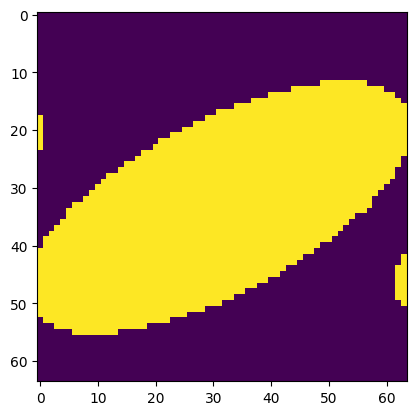

Number of air voxels: 0


In [6]:
# code here:
from __future__ import division
import numpy as np


def phantom3d(phantom='modified-shepp-logan', n=64):
    """Three-dimensional Shepp-Logan phantom
    Can be used to test 3-D reconstruction algorithms.
    Parameters
    ==========
    phantom: str
        One of {'modified-shepp-logan', 'shepp_logan', 'yu_ye_wang'},
        The type of phantom to draw.
    n : int, optional
        The grid size of the phantom
    Notes
    =====
    For any given voxel in the output image, the voxel's value is equal to the
    sum of the additive intensity values of all ellipsoids that the voxel is a
    part of.  If a voxel is not part of any ellipsoid, its value is 0.
    The additive intensity value A for an ellipsoid can be positive or
    negative;  if it is negative, the ellipsoid will be darker than the
    surrounding pixels.
    Note that, depending on the values of A, some voxels may have values
    outside the range [0,1].
    Copyright
    =========
    BSD License
    Copyright 2006 Matthias Christian Schabel (matthias @ stanfordalumni . org)
    University of Utah Department of Radiology
    Utah Center for Advanced Imaging Research
    729 Arapeen Drive
    """
    if phantom == 'modified-shepp-logan':
        ellipse = modified_shepp_logan()
    elif phantom == 'shepp_logan':
        ellipse = shepp_logan()
    elif phantom == 'yu_ye_wang':
        ellipse = yu_ye_wang()
    else:
        raise TypeError('phantom type "%s" not recognized' % phantom)

    p = np.zeros(n ** 3)
    rng = ((np.arange(0, n - 1)) - (n - 1) / 2) / ((n - 1) / 2)
    x, y, z = np.meshgrid(rng, rng, rng)
    coord = np.vstack((x.flatten(), y.flatten(), z.flatten()))
    pi = np.pi

    for k in np.arange(ellipse.shape[0]):
        A = ellipse[k, 0]                 # Amplitude change for this ellipsoid
        asq = ellipse[k, 1] ** 2          # a^2
        bsq = ellipse[k, 2] ** 2          # b^2
        csq = ellipse[k, 3] ** 2          # c^2
        x0 = ellipse[k, 4]                # x offset
        y0 = ellipse[k, 5]                # y offset
        z0 = ellipse[k, 6]                # z offset
        phi = ellipse[k, 7] * pi / 180    # first Euler angle in radians
        theta = ellipse[k, 8] * pi / 180  # second Euler angle in radians
        psi = ellipse[k, 9] * pi / 180   # third Euler angle in radians

        cphi = np.cos(phi)
        sphi = np.sin(phi)
        ctheta = np.cos(theta)
        stheta = np.sin(theta)
        cpsi = np.cos(psi)
        spsi = np.sin(psi)

        # Euler rotation matrix
        alpha = np.array([[cpsi * cphi - ctheta * sphi * spsi,
                           cpsi * sphi + ctheta * cphi * spsi,
                           spsi * stheta],
                          [-spsi * cphi - ctheta * sphi * cpsi,
                           -spsi * sphi + ctheta * cphi * cpsi,
                           cpsi * stheta],
                          [stheta * sphi, -stheta * cphi, ctheta]])

        # rotated ellipsoid coordinates
        coordp = np.dot(alpha, coord)
        idx = np.nonzero((coordp[0, :] - x0) ** 2.0 / asq +
                         (coordp[1, :] - y0) ** 2.0 / bsq +
                         (coordp[2, :] - z0) ** 2.0 / csq <= 1)[0]
        p[idx] = p[idx] + A

    return p.reshape((n, n, n))


def shepp_logan():
    arr = modified_shepp_logan()
    arr[:, 0] = np.array([1, -0.98, -0.02, -0.02, 0.01, 0.01, 0.01,
                          0.01, 0.01, 0.01])

    return arr


def modified_shepp_logan():
    """
    This head phantom is the same as the Shepp-Logan except
    the intensities are changed to yield higher contrast in
    the image.  Taken from Toft, 199-200.
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .810      0       0       0      0      0      0
        -.8  .6624  .874  .780      0  -.0184       0      0      0      0
        -.2  .1100  .310  .220    .22       0       0    -18      0     10
        -.2  .1600  .410  .280   -.22       0       0     18      0     10
         .1  .2100  .250  .410      0     .35    -.15      0      0      0
         .1  .0460  .046  .050      0      .1     .25      0      0      0
         .1  .0460  .046  .050      0     -.1     .25      0      0      0
         .1  .0460  .023  .050   -.08   -.605       0      0      0      0
         .1  .0230  .023  .020      0   -.606       0      0      0      0
         .1  .0230  .046  .020    .06   -.605       0      0      0      0'''
    return np.asarray(np.matrix(mat))


def yu_ye_wang():
    """
    Yu H, Ye Y, Wang G, Katsevich-Type Algorithms for
    Variable Radius Spiral Cone-Beam CT
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .900      0       0       0      0      0      0
        -.8  .6624  .874  .880      0       0       0      0      0      0
        -.2  .4100  .160  .210   -.22       0    -.25    108      0      0
        -.2  .3100  .110  .220    .22       0    -.25     72      0      0
         .2  .2100  .250  .500      0     .35    -.25      0      0      0
         .2  .0460  .046  .046      0      .1    -.25      0      0      0
         .1  .0460  .023  .020   -.08    -.65    -.25      0      0      0
         .1  .0460  .023  .020    .06    -.65    -.25     90      0      0
         .2  .0560  .040  .100    .06   -.105    .625     90      0      0
        -.2  .0560  .056  .100      0    .100    .625      0      0      0'''
    return np.asarray(np.matrix(mat))


if __name__ == '__main__':
    from matplotlib import pyplot as plt

p = phantom3d()

## to plot slice number 30 along transverse axis (horizantaly):
plt.imshow(p[30, :, :])
plt.show()

air_vox = (p == 0.1)
num_air = np.sum(air_vox)
print("Number of air voxels:", num_air)

### q5: Please plot the sum along the vertical direction or axis:

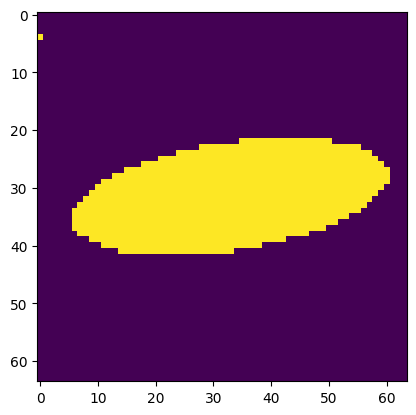

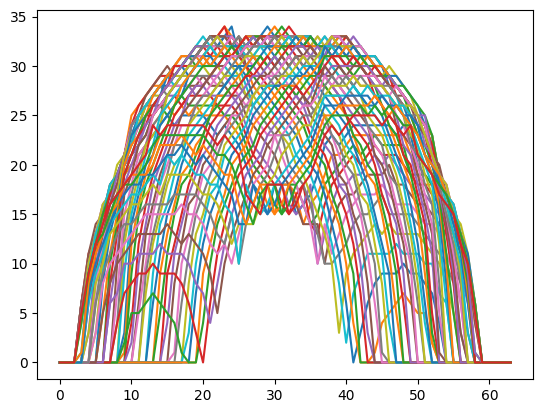

vertical sum: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
# code here:
# code here:
from __future__ import division
import numpy as np


def phantom3d(phantom='modified-shepp-logan', n=64):
    """Three-dimensional Shepp-Logan phantom
    Can be used to test 3-D reconstruction algorithms.
    Parameters
    ==========
    phantom: str
        One of {'modified-shepp-logan', 'shepp_logan', 'yu_ye_wang'},
        The type of phantom to draw.
    n : int, optional
        The grid size of the phantom
    Notes
    =====
    For any given voxel in the output image, the voxel's value is equal to the
    sum of the additive intensity values of all ellipsoids that the voxel is a
    part of.  If a voxel is not part of any ellipsoid, its value is 0.
    The additive intensity value A for an ellipsoid can be positive or
    negative;  if it is negative, the ellipsoid will be darker than the
    surrounding pixels.
    Note that, depending on the values of A, some voxels may have values
    outside the range [0,1].
    Copyright
    =========
    BSD License
    Copyright 2006 Matthias Christian Schabel (matthias @ stanfordalumni . org)
    University of Utah Department of Radiology
    Utah Center for Advanced Imaging Research
    729 Arapeen Drive
    """
    if phantom == 'modified-shepp-logan':
        ellipse = modified_shepp_logan()
    elif phantom == 'shepp_logan':
        ellipse = shepp_logan()
    elif phantom == 'yu_ye_wang':
        ellipse = yu_ye_wang()
    else:
        raise TypeError('phantom type "%s" not recognized' % phantom)

    p = np.zeros(n ** 3)
    rng = ((np.arange(0, n - 1)) - (n - 1) / 2) / ((n - 1) / 2)
    x, y, z = np.meshgrid(rng, rng, rng)
    coord = np.vstack((x.flatten(), y.flatten(), z.flatten()))
    pi = np.pi

    for k in np.arange(ellipse.shape[0]):
        A = ellipse[k, 0]                 # Amplitude change for this ellipsoid
        asq = ellipse[k, 1] ** 2          # a^2
        bsq = ellipse[k, 2] ** 2          # b^2
        csq = ellipse[k, 3] ** 2          # c^2
        x0 = ellipse[k, 4]                # x offset
        y0 = ellipse[k, 5]                # y offset
        z0 = ellipse[k, 6]                # z offset
        phi = ellipse[k, 7] * pi / 180    # first Euler angle in radians
        theta = ellipse[k, 8] * pi / 180  # second Euler angle in radians
        psi = ellipse[k, 9] * pi / 180   # third Euler angle in radians

        cphi = np.cos(phi)
        sphi = np.sin(phi)
        ctheta = np.cos(theta)
        stheta = np.sin(theta)
        cpsi = np.cos(psi)
        spsi = np.sin(psi)

        # Euler rotation matrix
        alpha = np.array([[cpsi * cphi - ctheta * sphi * spsi,
                           cpsi * sphi + ctheta * cphi * spsi,
                           spsi * stheta],
                          [-spsi * cphi - ctheta * sphi * cpsi,
                           -spsi * sphi + ctheta * cphi * cpsi,
                           cpsi * stheta],
                          [stheta * sphi, -stheta * cphi, ctheta]])

        # rotated ellipsoid coordinates
        coordp = np.dot(alpha, coord)
        idx = np.nonzero((coordp[0, :] - x0) ** 2.0 / asq +
                         (coordp[1, :] - y0) ** 2.0 / bsq +
                         (coordp[2, :] - z0) ** 2.0 / csq <= 1)[0]
        p[idx] = p[idx] + A

    return p.reshape((n, n, n))


def shepp_logan():
    arr = modified_shepp_logan()
    arr[:, 0] = np.array([1, -0.98, -0.02, -0.02, 0.01, 0.01, 0.01,
                          0.01, 0.01, 0.01])

    return arr


def modified_shepp_logan():
    """
    This head phantom is the same as the Shepp-Logan except
    the intensities are changed to yield higher contrast in
    the image.  Taken from Toft, 199-200.
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .810      0       0       0      0      0      0
        -.8  .6624  .874  .780      0  -.0184       0      0      0      0
        -.2  .1100  .310  .220    .22       0       0    -18      0     10
        -.2  .1600  .410  .280   -.22       0       0     18      0     10
         .1  .2100  .250  .410      0     .35    -.15      0      0      0
         .1  .0460  .046  .050      0      .1     .25      0      0      0
         .1  .0460  .046  .050      0     -.1     .25      0      0      0
         .1  .0460  .023  .050   -.08   -.605       0      0      0      0
         .1  .0230  .023  .020      0   -.606       0      0      0      0
         .1  .0230  .046  .020    .06   -.605       0      0      0      0'''
    return np.asarray(np.matrix(mat))


def yu_ye_wang():
    """
    Yu H, Ye Y, Wang G, Katsevich-Type Algorithms for
    Variable Radius Spiral Cone-Beam CT
          A      a     b     c     x0      y0      z0    phi  theta    psi
         -----------------------------------------------------------------
    """
    mat = '''
          1  .6900  .920  .900      0       0       0      0      0      0
        -.8  .6624  .874  .880      0       0       0      0      0      0
        -.2  .4100  .160  .210   -.22       0    -.25    108      0      0
        -.2  .3100  .110  .220    .22       0    -.25     72      0      0
         .2  .2100  .250  .500      0     .35    -.25      0      0      0
         .2  .0460  .046  .046      0      .1    -.25      0      0      0
         .1  .0460  .023  .020   -.08    -.65    -.25      0      0      0
         .1  .0460  .023  .020    .06    -.65    -.25     90      0      0
         .2  .0560  .040  .100    .06   -.105    .625     90      0      0
        -.2  .0560  .056  .100      0    .100    .625      0      0      0'''
    return np.asarray(np.matrix(mat))


if __name__ == '__main__':
    from matplotlib import pyplot as plt

p = phantom3d()

## to plot slice number 30 along frontal axis:
plt.imshow(p[:, 30, :])
plt.show()

vertical = np.sum(p, axis = 1)
plt.plot(vertical)
plt.show()
print("vertical sum:", vertical)


## ## Exercise 4 (10 points):
Use Numpy to Solve the linear system of equations:
```
20x + 10y + z    = 230
17x + 22y - 3z   = 236
5x  + 3y  + 100z = 59
```


hint: https://stackabuse.com/solving-systems-of-linear-equations-with-pythons-numpy/ + materials provided during the lectures

In [40]:
# code here:
import numpy as np
a = np.array([[20, 10, 1],[17, 22, -3],[5, 3, 100]])
b = np.array([230,236,59])
c = np.linalg.solve(a, b)

print(c)

[1.00000000e+01 3.00000000e+00 1.11141677e-17]


## Exercice 5 (15 points):
The table below shows some data from the early days of the Italian clothing company Benetton. Each row in the table shows Benetton’s sales for a year and the amount spent on advertising that year. In this case, our outcome of interest is sales—it is what we want to predict. If we use advertising as the predictor variable, linear regression estimates that:
```
Sales = 168 + 23 * Advertising. 
```
That is, if advertising expenditure is increased by one million Euro, then sales will be expected to increase by 23 million Euros, and if there was no advertising we would expect sales of 168 million Euros.
![alt text here](image2.png)

1. Please prove it using the numpy linear regression method.
2. Show the results in a plot using the matplotlib module

In [41]:
# q1:
import numpy as np
import matplotlib.pyplot as plt

sales = np.array([651,762,856,1063,1190,1298,1421,1440,1518])
ad = np.array([23,26,30,34,43,48,52,57,58])

a = np.vstack([ad, np.ones(len(ad))]).T

solution, residuals, rank, singular_values = np.linalg.lstsq(a, sales, rcond=None)   

slope, intercept = solution
line = slope * ad + intercept
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 23.422785592827324
Intercept: 167.68294945122898


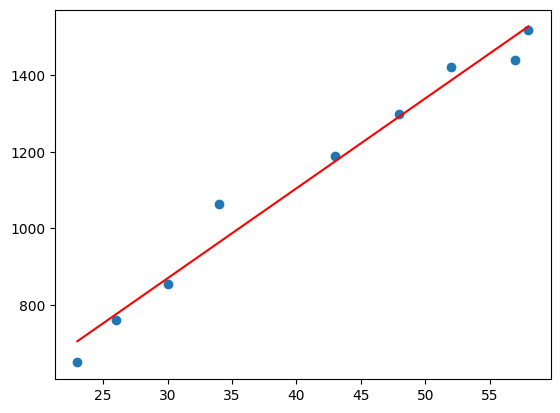

Slope: 23.422785592827324
Intercept: 167.68294945122898


In [40]:
# q2:
import numpy as np
import matplotlib.pyplot as plt

sales = np.array([651,762,856,1063,1190,1298,1421,1440,1518])
ad = np.array([23,26,30,34,43,48,52,57,58])
plt.plot(ad,sales,'o')

a = np.vstack([ad, np.ones(len(ad))]).T

solution, residuals, rank, singular_values = np.linalg.lstsq(a, sales, rcond=None)
    

slope, intercept = solution
line = slope * ad + intercept
plt.plot(ad, line, 'r-') 
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)